In [180]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [181]:
high_reward = 0.2

In [182]:
def read_results(env: str, alg: str) -> pd.DataFrame:
  root_dir = Path.cwd().parent
  results_dir = root_dir / "results" / env / alg 

  history_path = results_dir / "history.csv"
  history_df = pd.read_csv(history_path)
  history_df['timestamp'] = pd.to_datetime(history_df['timestamp'])
  return history_df

In [183]:
def count_time(history_df: pd.DataFrame) -> int:
  from_time = history_df['timestamp'].iloc[0]
  to_time = history_df['timestamp'].iloc[-1]
  diff = to_time - from_time
  return diff

In [184]:
def count_high_rewards(history_df: pd.DataFrame) -> int:
  high_rewards = (history_df['reward'] > high_reward).sum()
  return high_rewards

In [185]:
def get_convergence_iteration(history_df: pd.DataFrame) -> int | None:
  mask = history_df['reward_ma'] > high_reward
  if not mask.any():
    return None
  convergence_iteration = history_df.loc[mask].iloc[0]
  return convergence_iteration

In [186]:
def render_reward_history(history_df: pd.DataFrame, alg: str) -> None:
  plt.figure(figsize=(8, 4))
  plt.plot(history_df['reward'], alpha=0.5, label='Нагорода')
  plt.plot(history_df['reward_ma'], color='red', linewidth=2, label='Рухоме середнє')
  plt.xlabel('Ітерації')
  plt.ylabel('Нагорода')
  plt.legend()
  title = alg.replace('_', ' ').upper()
  plt.title(title)
  plt.grid(True)
  plt.show()

In [187]:
def get_rewards_sum(history_df: pd.DataFrame) -> int:
  rewards_sum = (history_df['reward']).sum()
  return rewards_sum

In [191]:
def get_highest_reward(history_df: pd.DataFrame) -> int:
  highest_reward = history_df['reward'].max()
  return highest_reward

In [192]:
def analyse_alg(env: str, alg: str) -> None:
  history_df = read_results(env, alg)
  history_df['reward_ma'] = history_df['reward'].rolling(window=30).mean()
  render_reward_history(history_df, alg)
  results = {
    'alg': alg,
    'env': env,
    'time_diff': count_time(history_df),
    'high_rewards': count_high_rewards(history_df),
    'convergence_iteration': get_convergence_iteration(history_df),
    'rewards_sum': get_rewards_sum(history_df),
    'highest_reward': get_highest_reward(history_df)
  }
  return results

In [193]:
def analyse() -> None:
  algs = ['mab', 'mab_decay', 'mab_exponential']
  rows = []
  for alg in algs:
    res = analyse_alg('simulation', alg)
    rows.append(res)

  results_df = pd.DataFrame(rows)
  return results_df.head()

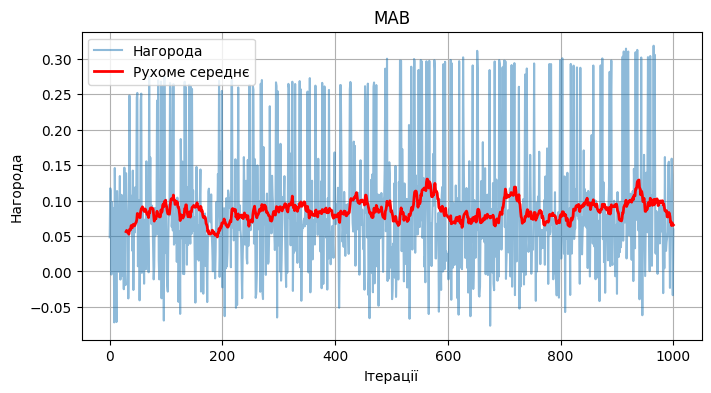

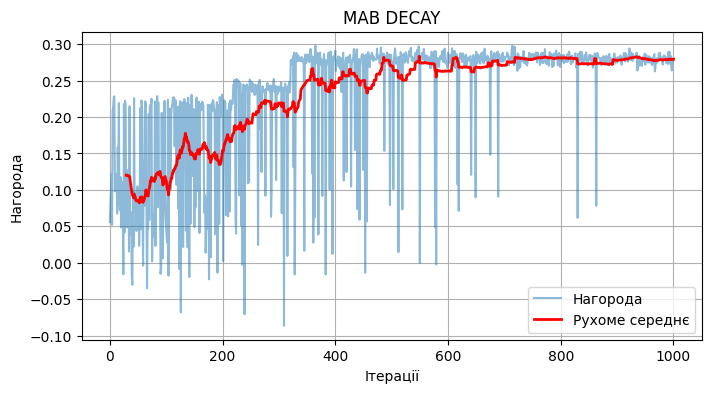

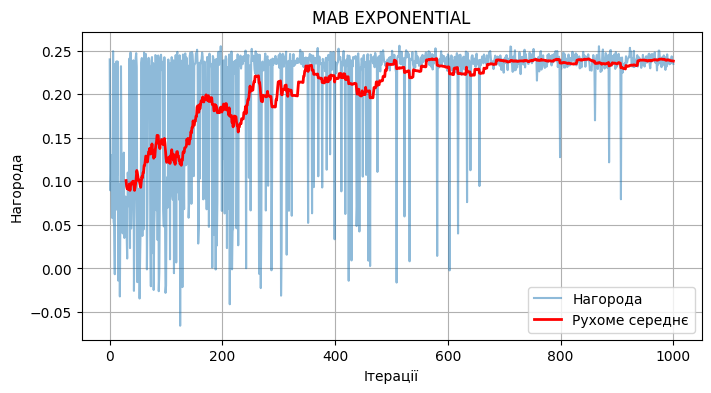

,alg,env,time_diff,high_rewards,convergence_iteration,rewards_sum,highest_reward
0,mab,simulation,0 days 00:00:04,121,None,84.6335,0.3185
1,mab_decay,simulation,0 days 00:00:03,829,iteration 255 reward ...,233.5882,0.2977
2,mab_exponential,simulation,0 days 00:00:04,835,iteration 249 reward ...,208.8593,0.2556


In [194]:
analyse()